In [19]:
import xarray as xr
import pyproj
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
from numpy import s_
import cosima_cookbook as cc
from OpenVisus import *
from backend_v2 import *

In [35]:
%%time
data = xr.open_dataset('BedMachineAntarctica_2020-07-15_v02.nc')
data

CPU times: user 13.4 ms, sys: 2.62 ms, total: 16 ms
Wall time: 13.8 ms


<xarray.Dataset>
Dimensions:    (x: 13333, y: 13333)
Coordinates:
  * x          (x) int32 -3333000 -3332500 -3332000 ... 3332000 3332500 3333000
  * y          (y) int32 3333000 3332500 3332000 ... -3332000 -3332500 -3333000
Data variables:
    mapping    |S1 ...
    mask       (y, x) int8 ...
    firn       (y, x) float32 ...
    surface    (y, x) float32 ...
    thickness  (y, x) float32 ...
    bed        (y, x) float32 ...
    errbed     (y, x) float32 ...
    source     (y, x) int8 ...
    geoid      (y, x) int16 ...
Attributes: (12/17)
    Conventions:                 CF-1.7
    Title:                       BedMachine Antarctica
    Author:                      Mathieu Morlighem
    version:                     15-Jul-2020 (v2.0)
    nx:                          13333.0
    ny:                          13333.0
    ...                          ...
    ymax:                        3333000
    spacing:                     500
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2019), Deep glacial tr...
    Notes:                       Data processed at the Department of Earth Sy...

In [21]:
%%time
filename='visus.idx'
field=[
        Field('mask', 'int8'),
      Field('firn', 'float32'),
      Field('surface', 'float32'),
      Field('thickness', 'float32'),
      Field('bed', 'float32'),
      Field('errbed', 'float32'),
      Field('source', 'int8'),
      Field('geoid', 'int16')]

CPU times: user 281 µs, sys: 326 µs, total: 607 µs
Wall time: 316 µs


In [22]:
%%time
db=CreateIdx(url=filename,dims=[13333,13333],fields=field)
# print(db.getDatasetBody().toString())

<dataset url="visus.idx" typename="IdxDataset">
	<idxfile>
		<version value="6" />
		<bitmask value="V0101010101010101010101010101" />
		<box value="0 13333 0 13333" />
		<bitsperblock value="16" />
		<blocksperfile value="21" />
		<block_interleaving value="0" />
		<filename_template value="./visus/%04x.bin" />
		<missing_blocks value="False" />
		<time_template value="" />
		<field name="mask" description="" index="" default_compression="" default_layout="" default_value="0" filter="" dtype="int8" />
		<field name="firn" description="" index="" default_compression="" default_layout="" default_value="0" filter="" dtype="float32" />
		<field name="surface" description="" index="" default_compression="" default_layout="" default_value="0" filter="" dtype="float32" />
		<field name="thickness" description="" index="" default_compression="" default_layout="" default_value="0" filter="" dtype="float32" />
		<field name="bed" description="" index="" default_compression="" default_layout="" 

In [23]:
%%time
# for f in db.getFields():
#     db.write(data[f].values, field=f)
    print(f)

mask
firn
surface
thickness
bed
errbed
source
geoid
CPU times: user 1.59 ms, sys: 570 µs, total: 2.16 ms
Wall time: 1.72 ms


In [24]:
%%time
ds = xr.open_dataset("visus.idx",engine=OpenVisusBackendEntrypoint,dims=['y','x'],coords=data.coords,
                     chunks={'x': 5000, 'y': 5000} ).sortby('y')
data=ds.isel(y=slice(0,13333),x=slice(0,13333))

data

['y', 'x']
Adding field  mask shape  [13333, 13333] dtype  int8 labels  ['y', 'x'] timesteps  [0] Max Resolution  28
['y', 'x']
Adding field  firn shape  [13333, 13333] dtype  float32 labels  ['y', 'x'] timesteps  [0] Max Resolution  28
['y', 'x']
Adding field  surface shape  [13333, 13333] dtype  float32 labels  ['y', 'x'] timesteps  [0] Max Resolution  28
['y', 'x']
Adding field  thickness shape  [13333, 13333] dtype  float32 labels  ['y', 'x'] timesteps  [0] Max Resolution  28
['y', 'x']
Adding field  bed shape  [13333, 13333] dtype  float32 labels  ['y', 'x'] timesteps  [0] Max Resolution  28
['y', 'x']
Adding field  errbed shape  [13333, 13333] dtype  float32 labels  ['y', 'x'] timesteps  [0] Max Resolution  28
['y', 'x']
Adding field  source shape  [13333, 13333] dtype  int8 labels  ['y', 'x'] timesteps  [0] Max Resolution  28
['y', 'x']
Adding field  geoid shape  [13333, 13333] dtype  int16 labels  ['y', 'x'] timesteps  [0] Max Resolution  28


<xarray.Dataset>
Dimensions:    (y: 13333, x: 13333)
Coordinates:
  * x          (x) int32 -3333000 -3332500 -3332000 ... 3332000 3332500 3333000
  * y          (y) int32 -3333000 -3332500 -3332000 ... 3332000 3332500 3333000
Data variables:
    mask       (y, x) int8 dask.array<chunksize=(3333, 5000), meta=np.ndarray>
    firn       (y, x) float32 dask.array<chunksize=(3333, 5000), meta=np.ndarray>
    surface    (y, x) float32 dask.array<chunksize=(3333, 5000), meta=np.ndarray>
    thickness  (y, x) float32 dask.array<chunksize=(3333, 5000), meta=np.ndarray>
    bed        (y, x) float32 dask.array<chunksize=(3333, 5000), meta=np.ndarray>
    errbed     (y, x) float32 dask.array<chunksize=(3333, 5000), meta=np.ndarray>
    source     (y, x) int8 dask.array<chunksize=(3333, 5000), meta=np.ndarray>
    geoid      (y, x) int16 dask.array<chunksize=(3333, 5000), meta=np.ndarray>

_raw_indexing_method_raw_indexing_method key _raw_indexing_method key  key (slice(10000, 13333, 1), slice(10000, 13333, 1))
_raw_indexing_method(slice(10000, 13333, 1), slice(0, 5000, 1))
_raw_indexing_method key (slice(5000, 10000, 1), slice(0, 5000, 1))
 key (slice(5000, 10000, 1), slice(5000, 10000, 1))
(slice(10000, 13333, 1), slice(5000, 10000, 1))
_raw_indexing_method key (slice(5000, 10000, 1), slice(10000, 13333, 1))
_raw_indexing_method_raw_indexing_method  key (slice(0, 5000, 1), slice(0, 5000, 1))
key (slice(0, 5000, 1), slice(5000, 10000, 1))
_raw_indexing_method key (slice(0, 5000, 1), slice(10000, 13333, 1))


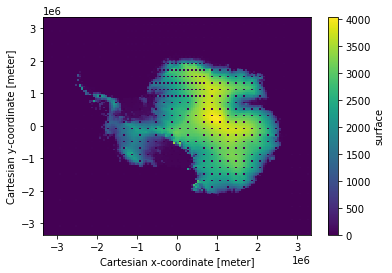

In [25]:
%%time
subset = data.isel(x=slice(None, None, 100), y=slice(None, None, 100))
subset.surface.plot()

_raw_indexing_method_raw_indexing_method_raw_indexing_method key (slice(10000, 13333, 1), slice(0, 5000, 1))
 key (slice(10000, 13333, 1), slice(5000, 10000, 1))
_raw_indexing_method key (slice(10000, 13333, 1), slice(10000, 13333, 1)) key (slice(5000, 10000, 1), slice(0, 5000, 1))
_raw_indexing_method
_raw_indexing_method _raw_indexing_method key (slice(5000, 10000, 1), slice(10000, 13333, 1))
key_raw_indexing_method key  key (slice(0, 5000, 1), slice(0, 5000, 1))
 (slice(5000, 10000, 1), slice(5000, 10000, 1))(slice(0, 5000, 1), slice(5000, 10000, 1))

_raw_indexing_method key (slice(0, 5000, 1), slice(10000, 13333, 1))


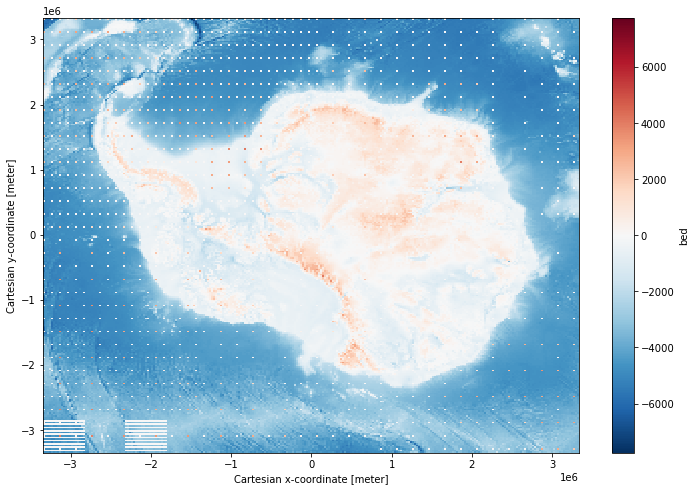

In [26]:
%%time
data.bed.isel(x=s_[0::50], y=s_[0::50]).plot(size=8);

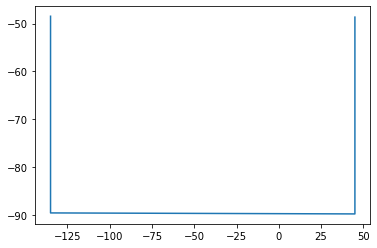

In [27]:
source_crs = 'epsg:3031' # Coordinate system of the file
target_crs = 'epsg:4326' # Global lat-lon coordinate system

polar_to_latlon = pyproj.Transformer.from_crs(source_crs, target_crs)
lat, lon = polar_to_latlon.transform(subset.x, subset.y)
plt.plot(lon, lat)

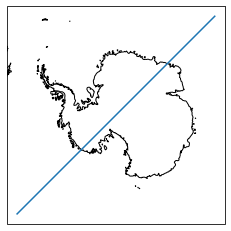

In [28]:
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.plot(lon, lat, transform=ccrs.PlateCarree())
ax.coastlines()

_raw_indexing_method_raw_indexing_method_raw_indexing_method key (slice(10000, 13333, 1), slice(0, 5000, 1))
_raw_indexing_method key  key (slice(5000, 10000, 1), slice(0, 5000, 1))
(slice(10000, 13333, 1), slice(10000, 13333, 1))
 key (slice(10000, 13333, 1), slice(5000, 10000, 1))
_raw_indexing_method_raw_indexing_method key _raw_indexing_method(slice(5000, 10000, 1), slice(10000, 13333, 1))
_raw_indexing_method key (slice(0, 5000, 1), slice(0, 5000, 1))
 key (slice(0, 5000, 1), slice(5000, 10000, 1))
 key (slice(5000, 10000, 1), slice(5000, 10000, 1))
_raw_indexing_method key (slice(0, 5000, 1), slice(10000, 13333, 1))


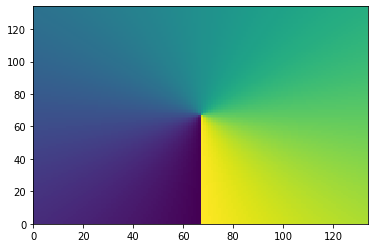

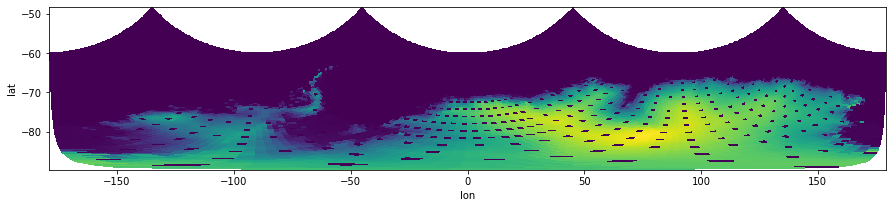

In [29]:
X, Y = numpy.meshgrid(subset.x, subset.y)
lat, lon = polar_to_latlon.transform(X, Y)

plt.pcolormesh(lon)
subset.coords['lat'] = (subset.surface.dims, lat)
subset.coords['lon'] = (subset.surface.dims, lon)

subset.surface
plt.figure(figsize=(15,3))
subset.surface.plot.pcolormesh('lon', 'lat', add_colorbar=False)


_raw_indexing_method_raw_indexing_method_raw_indexing_method key (slice(10000, 13333, 1), slice(0, 5000, 1))
_raw_indexing_method key (slice(10000, 13333, 1), slice(5000, 10000, 1))
 key (slice(5000, 10000, 1), slice(0, 5000, 1))
 key _raw_indexing_method(slice(10000, 13333, 1), slice(10000, 13333, 1))
 key _raw_indexing_method key _raw_indexing_method(slice(5000, 10000, 1), slice(5000, 10000, 1))
(slice(5000, 10000, 1), slice(10000, 13333, 1))
 _raw_indexing_method keykey (slice(0, 5000, 1), slice(5000, 10000, 1))
 (slice(0, 5000, 1), slice(0, 5000, 1))
_raw_indexing_method key (slice(0, 5000, 1), slice(10000, 13333, 1))


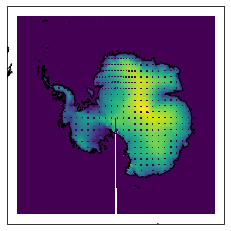

In [30]:
ax = plt.axes(projection=ccrs.SouthPolarStereo())
subset.surface.plot.pcolormesh('lon', 'lat', ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
ax.coastlines()

In [31]:
def lon_lat_box(lon_bounds, lat_bounds, refinement=2):
    """
    Coordinates along the boundary of a rectangle in lat-lon coordinates
    
    Args:
        lon_bounds: (min, max) lon values
        lat_bounds: (min, max) lat values
        refinement: number of points to draw along each edge
        
    Returns: (lons, lats)
    """
    lons = []
    lats = []
    
    lons.append(numpy.linspace(lon_bounds[0], lon_bounds[-1], num=refinement))
    lats.append(numpy.linspace(lat_bounds[0], lat_bounds[0], num=refinement))
                
    lons.append(numpy.linspace(lon_bounds[-1], lon_bounds[-1], num=refinement))
    lats.append(numpy.linspace(lat_bounds[0], lat_bounds[-1], num=refinement))
                
    lons.append(numpy.linspace(lon_bounds[-1], lon_bounds[0], num=refinement))
    lats.append(numpy.linspace(lat_bounds[-1], lat_bounds[-1], num=refinement))
    
    lons.append(numpy.linspace(lon_bounds[0], lon_bounds[0], num=refinement))
    lats.append(numpy.linspace(lat_bounds[-1], lat_bounds[0], num=refinement))
    
    return numpy.concatenate(lons), numpy.concatenate(lats)

_raw_indexing_method key (slice(10000, 13333, 1), slice(0, 5000, 1))
_raw_indexing_method key (slice(10000, 13333, 1), slice(5000, 10000, 1))
_raw_indexing_method key (slice(10000, 13333, 1), slice(10000, 13333, 1))
_raw_indexing_method _raw_indexing_methodkey (slice(5000, 10000, 1), slice(0, 5000, 1)) key (slice(5000, 10000, 1), slice(5000, 10000, 1))

_raw_indexing_method_raw_indexing_method key (slice(5000, 10000, 1), slice(10000, 13333, 1))
_raw_indexing_method key (slice(0, 5000, 1), slice(0, 5000, 1))
 key (slice(0, 5000, 1), slice(5000, 10000, 1))
_raw_indexing_method key (slice(0, 5000, 1), slice(10000, 13333, 1))


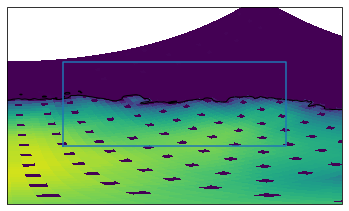

In [32]:
boxlon, boxlat = lon_lat_box([100,140],[-75,-60], refinement=100)

ax = plt.axes(projection=ccrs.PlateCarree())
subset.surface.plot.pcolormesh('lon', 'lat', ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
ax.plot(boxlon, boxlat, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([90,150,-85,-50])

In [33]:
polar_to_cart = pyproj.Transformer.from_crs(source_crs, '+proj=geocent')
cX, cY, cZ = polar_to_cart.transform(X, Y, 0*X)

_raw_indexing_method_raw_indexing_method key _raw_indexing_method key (slice(10000, 13333, 1), slice(5000, 10000, 1))
_raw_indexing_method(slice(10000, 13333, 1), slice(0, 5000, 1))
 key (slice(5000, 10000, 1), slice(0, 5000, 1))
 _raw_indexing_methodkey (slice(10000, 13333, 1), slice(10000, 13333, 1))
 key (slice(5000, 10000, 1), slice(5000, 10000, 1))
_raw_indexing_method key (slice(5000, 10000, 1), slice(10000, 13333, 1))
_raw_indexing_method key (slice(0, 5000, 1), slice(0, 5000, 1))
_raw_indexing_method key (slice(0, 5000, 1), slice(5000, 10000, 1))
_raw_indexing_method key (slice(0, 5000, 1), slice(10000, 13333, 1))


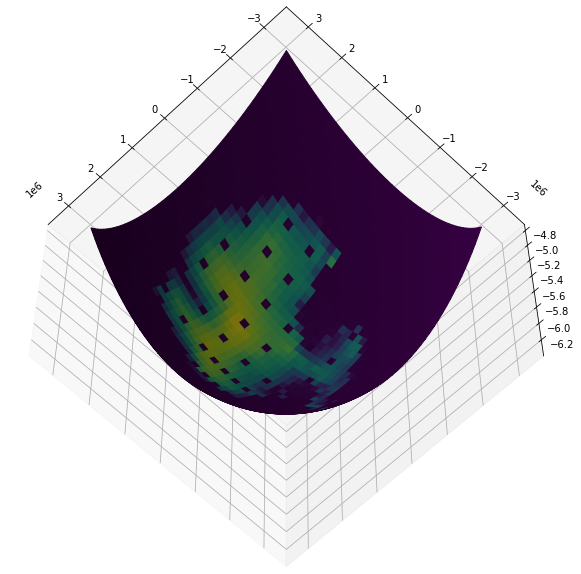

In [34]:
import matplotlib

plt.figure(figsize=(15,10))

# Make a 3d plot
ax = plt.axes(projection='3d')

# Use the values to colour the surface
cmap = plt.cm.ScalarMappable(cmap='viridis')
colors = cmap.to_rgba(subset.surface)

ax.plot_surface(cX, cY, cZ, facecolors=colors)

# Camera position
ax.elev = -60
ax.azim = 135